# Plotting and Customizing Quantum Circuits using MatRenderer

Author: Rushiraj Gadhvi (gadhvirushiraj@gmail.com)

This notebook serves as a comprehensive guide to plotting quantum circuits using QuTiP-QIP's MatRenderer, a Matplotlib-based rendering tool. It explores the various customization options available to users for creating and modifying plots. The content is organized into two main sections:

- **Circuit-Level Customization**
- **Gate-Level Customization**

In [1]:
import qutip
import numpy as np
from qutip import Qobj
from qutip_qip.operations import rx
from qutip_qip.circuit import QubitCircuit

In [2]:
qc = QubitCircuit(2, num_cbits=1)
qc.add_gate("CNOT", controls=0, targets=1)
qc.add_gate("SNOT", targets=1)
qc.add_gate("ISWAP", targets=[0, 1])
qc.add_measurement("M0", targets=1, classical_store=0)

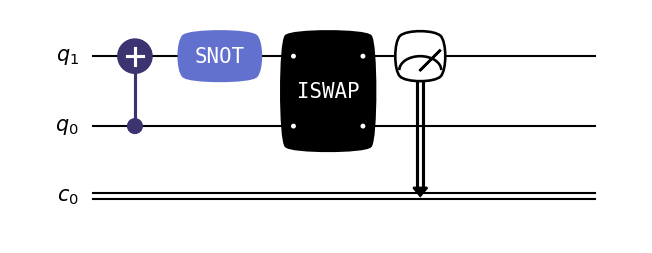

In [3]:
qc.draw()

---

### Circuit Level Customization Options

---

##### Changing FontSize

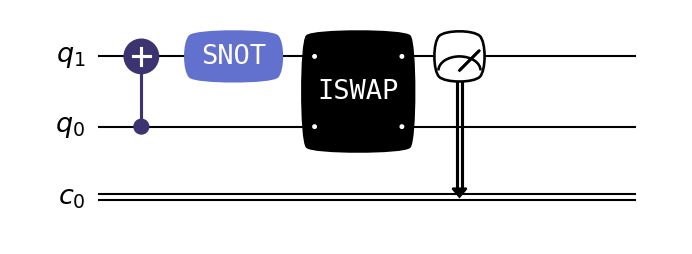

In [4]:
qc.draw(fontsize=13)

##### Background Color

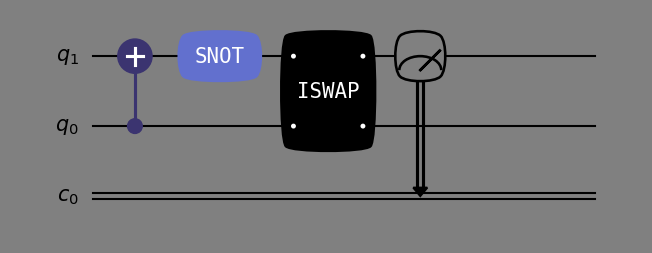

In [5]:
qc.draw(bgcolor="gray")

##### Gate Bulge Control

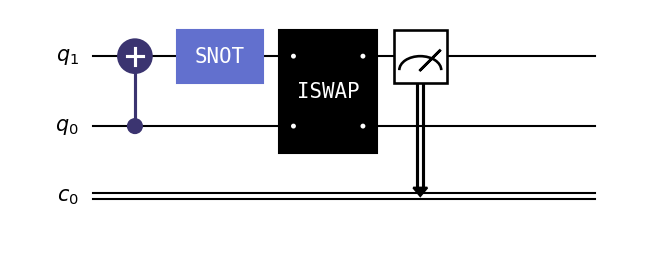

In [6]:
qc.draw(bulge=False)

##### Custom Wire Labels

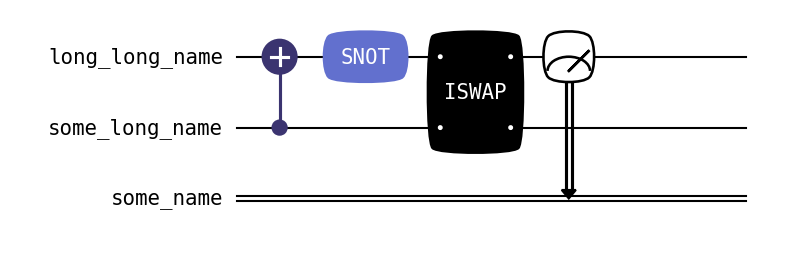

In [7]:
qc.draw(wire_label=["some_name", "some_long_name", "long_long_name"])

##### Control extra wire extension at end of circuit

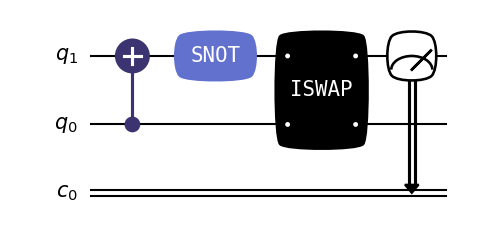

In [8]:
qc.draw(end_wire_ext=0)

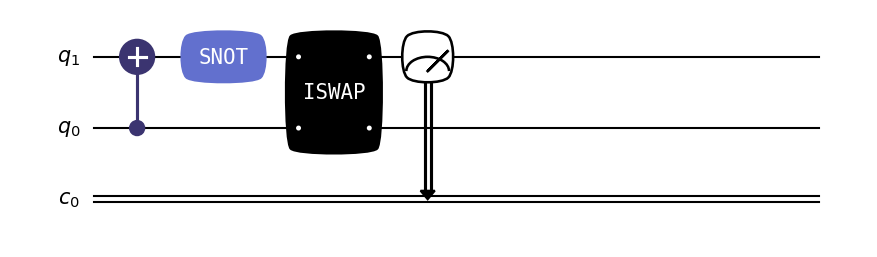

In [9]:
qc.draw(end_wire_ext=5)

##### Condense Circuit

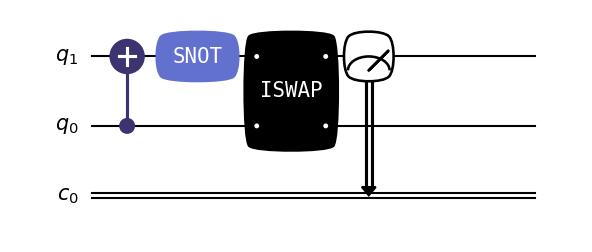

In [10]:
qc.draw(gate_margin=0.1)

##### Adding Title

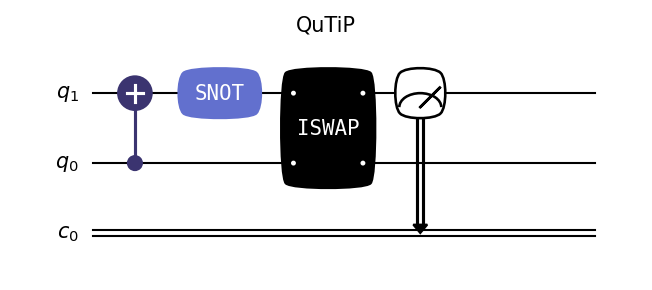

In [11]:
qc.draw(title="QuTiP")

##### Changing Theme

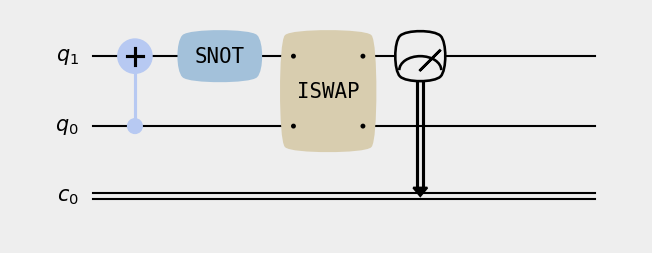

In [12]:
qc.draw(theme="light")

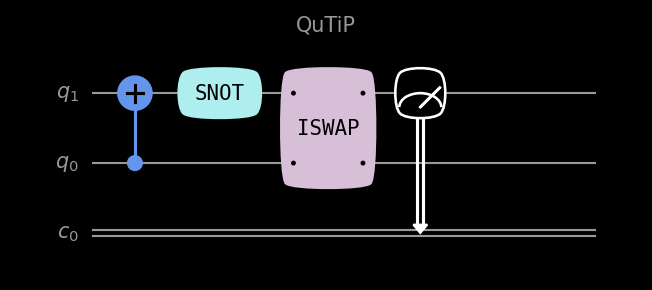

In [13]:
qc.draw(theme="dark", title="QuTiP")

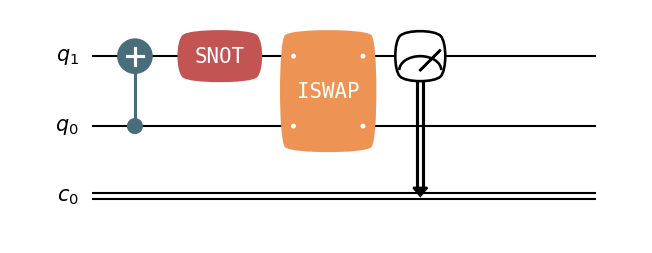

In [14]:
qc.draw(theme="modern")

##### Aligning Layer

In [15]:
qc = QubitCircuit(3)
qc.add_gate("H", targets=[1])
qc.add_gate("RZ", targets=[2], arg_value=0.5, style={"showarg": True})
qc.add_gate("RZ", targets=[2], arg_value=0.5, style={"showarg": True})
qc.add_gate("CNOT", controls=[0], targets=[1], style={"showarg": True})
qc.add_gate("CNOT", controls=[0], targets=[1], style={"showarg": True})
qc.add_gate("SWAP", targets=[0, 2])

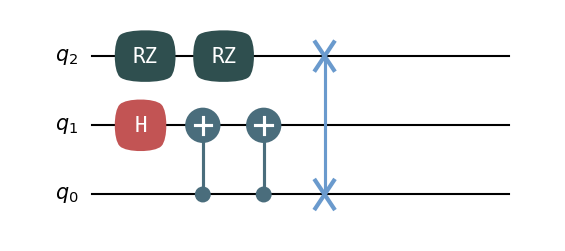

In [16]:
# not-aligned gates
qc.draw(theme="modern")

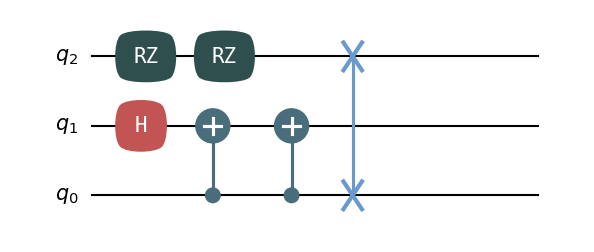

In [17]:
# aligned gates
qc.draw(align_layer=True, theme="modern")

---

### Gate Level Customization Options

---

In [18]:
qc = QubitCircuit(7)
qc.add_gate("H", targets=[0], style={"fontcolor": "red"})
qc.add_gate("H", targets=[1], style={"fontstyle": "italic"})
qc.add_gate("H", targets=[2], style={"fontweight": "bold"})
qc.add_gate("H", targets=[3], style={"color": "green"})
qc.add_gate("H", targets=[4], style={"fontsize": 12})
qc.add_gate("H", targets=[5], arg_label="hadamard gate")
qc.add_gate("H", targets=[6], style={"fontfamily": "cursive"})

findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


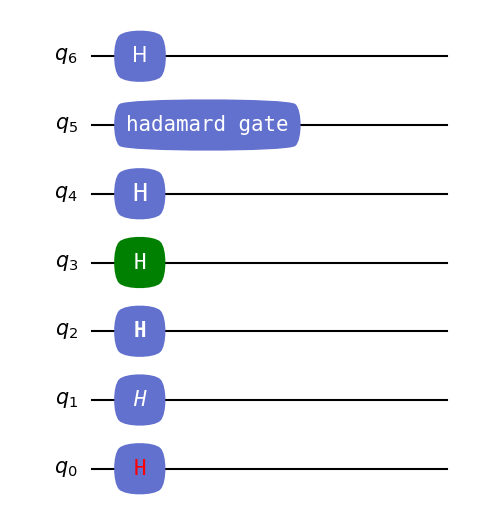

In [19]:
qc.draw()

##### Rendering Argument Value

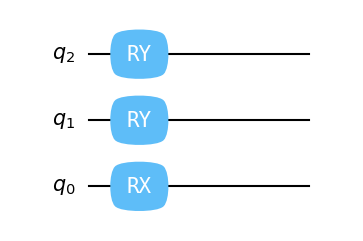

In [20]:
qc = QubitCircuit(3)
qc.add_gate("RX", targets=[0], arg_value=np.pi / 12, style={"showarg": True})
qc.add_gate(
    "RY", targets=[1], arg_value=2 * np.pi / 3, style={"showarg": True}
)
qc.add_gate("RY", targets=[2], arg_value=0.3, style={"showarg": True})
qc.draw()

#### With User Custom Gates

In [21]:
def user_gate1(arg_value):
    # controlled rotation X
    mat = np.zeros((4, 4), dtype=np.complex)
    mat[0, 0] = mat[1, 1] = 1.0
    mat[2:4, 2:4] = rx(arg_value).full()
    return Qobj(mat, dims=[[2, 2], [2, 2]])


def user_gate2():
    # S gate
    mat = np.array([[1.0, 0], [0.0, 1.0j]])
    return Qobj(mat, dims=[[2], [2]])

In [22]:
qc = QubitCircuit(3)
qc.user_gates = {"CTRLRX": user_gate1, "S": user_gate2}

# qubit 1 controls qubit 0
qc.add_gate("CTRLRX", targets=[1, 0], arg_value=np.pi / 2)
# qubit 2 is target of S gate
qc.add_gate("S", targets=[2])

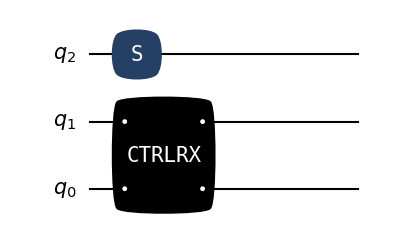

In [23]:
qc.draw()

---

### Some more circuit examples

---

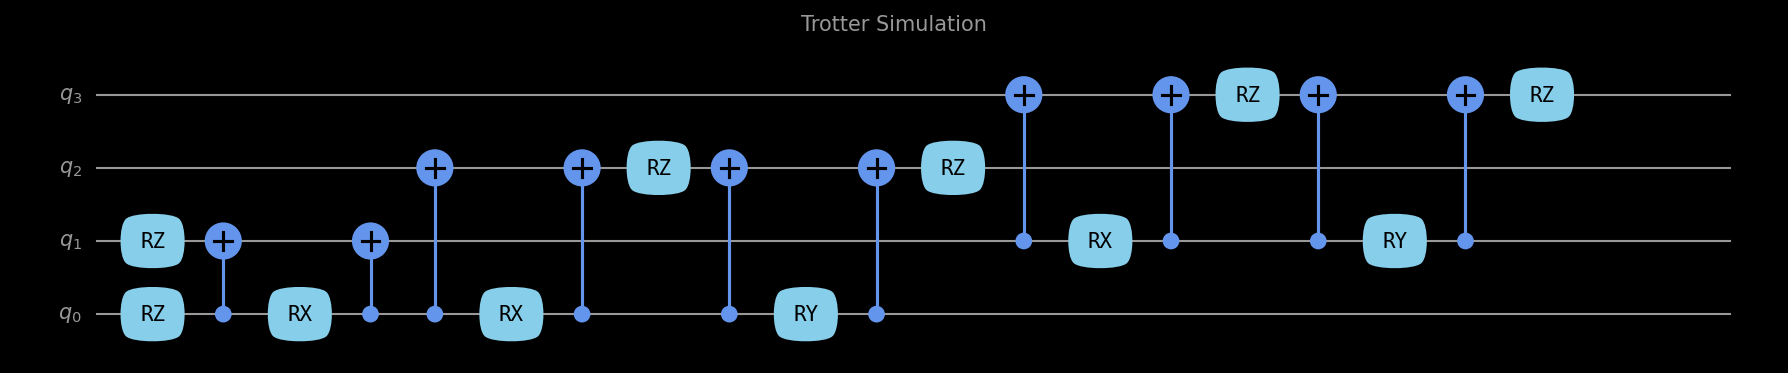

In [24]:
trotter_simulation_noisey = QubitCircuit(4)

trotter_simulation_noisey.add_gate("RZ", targets=[0])
trotter_simulation_noisey.add_gate("RZ", targets=[1])

trotter_simulation_noisey.add_gate("CNOT", controls=0, targets=1)
trotter_simulation_noisey.add_gate("RX", targets=[0])
trotter_simulation_noisey.add_gate("CNOT", controls=0, targets=1)

trotter_simulation_noisey.add_gate("CNOT", controls=0, targets=2)
trotter_simulation_noisey.add_gate("RX", targets=[0])
trotter_simulation_noisey.add_gate("CNOT", controls=0, targets=2)

trotter_simulation_noisey.add_gate("RZ", targets=[2], arg_value=-np.pi / 2)
trotter_simulation_noisey.add_gate("CNOT", controls=0, targets=2)
trotter_simulation_noisey.add_gate("RY", targets=[0])
trotter_simulation_noisey.add_gate("CNOT", controls=0, targets=2)
trotter_simulation_noisey.add_gate("RZ", targets=[2], arg_value=np.pi / 2)

trotter_simulation_noisey.add_gate("CNOT", controls=1, targets=3)
trotter_simulation_noisey.add_gate("RX", targets=[1])
trotter_simulation_noisey.add_gate("CNOT", controls=1, targets=3)

trotter_simulation_noisey.add_gate("RZ", targets=[3], arg_value=-np.pi / 2)
trotter_simulation_noisey.add_gate("CNOT", controls=1, targets=3)
trotter_simulation_noisey.add_gate("RY", targets=[1])
trotter_simulation_noisey.add_gate("CNOT", controls=1, targets=3)
trotter_simulation_noisey.add_gate("RZ", targets=[3], arg_value=np.pi / 2)

trotter_simulation_noisey.draw(theme="dark", title="Trotter Simulation")

---

In [25]:
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Simon Cross, Asier Galicia, Paul Menczel, and Patrick Hopf.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      5.3.0.dev0+6e4b53d
Numpy Version:      2.3.5
Scipy Version:      1.16.3
Cython Version:     3.2.2
Matplotlib Version: 3.10.8
Python Version:     3.12.0
Number of CPUs:     4
BLAS Info:          blas
INTEL MKL Ext:      None
Platform Info:      Linux (x86_64)
Installation path:  /home/runner/miniconda3/envs/test-environment-v5/lib/python3.12/site-packages/qutip

Installed QuTiP family packages
-------------------------------

qutip-qtrl: 

qutip-jax: 0.1.1.dev6
qutip-qip: 0.5.0.dev0+81a92b9

Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qutip.cite()`
